In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

In [3]:
def filtro_laplaciano(c):
    filter_size = 10
    sigma2 = filter_size/6.
    sigma1 = c*sigma2
    x_vals = np.linspace(-3*sigma2, 3*sigma2, filter_size)
    y_vals = x_vals.copy()
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
        for col in range(filter_size):
            y = y_vals[col]
            f1 = (1/(2*np.pi*(sigma1**2)))*(np.e**(-(x**2+y**2)/(2*sigma1**2)))
            f2 = (1/(2*np.pi*(sigma2**2)))*(np.e**(-(x**2+y**2)/(2*sigma2**2)))
            f = f1-f2
            z[row, col] = f1-f2
    z = z - np.mean(z)

    return z

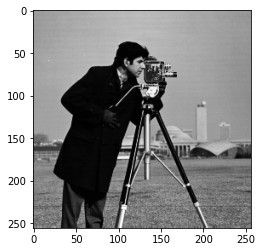

In [4]:
img = plt.imread('cameraman.tiff')
plt.imshow(img, 'gray')

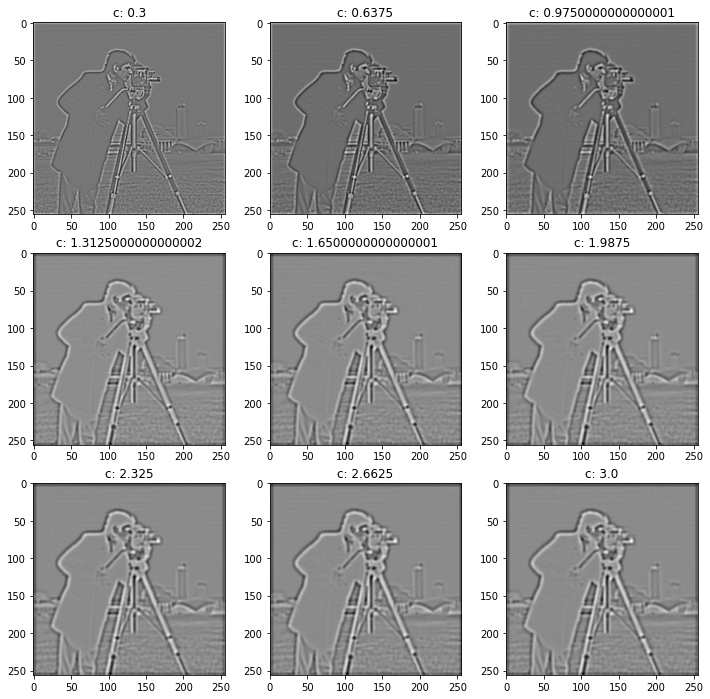

In [30]:
plt.figure(figsize=[12,12])
c_values = np.linspace(0.3, 3, 9)
pos = 1
for i in c_values:
    w = filtro_laplaciano(i)
    img_filtered = convolve(img, w, mode='same')
    plt.subplot(3,3,pos)
    plt.imshow(img_filtered, 'gray')
    plt.title('c: ' + str(i))
    pos += 1